In [1]:
# Cellule 1 — Imports et configuration

# Exploration des variables NHANES 2021-2023 (37 variables sélectionnées)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Réglages d'affichage
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")

print("Librairies importées avec succès")


Librairies importées avec succès


In [2]:
# Cellule 2 : Chargement du dataset sélectionné
df = pd.read_csv("nhanes_selected_2021_2023.csv")

print("Données chargées :", df.shape)
df.head()


Données chargées : (11933, 37)


,SEQN,RIDAGEYR,RIDRETH3,RIAGENDR,LBXTC,DIQ010,BMXHT,BMXBMI,BMXWT,BMXWAIST,BMXARMC,DR1TKCAL,DR2TKCAL,DR1TPROT,DR2TPROT,DR1TSUGR,DR2TSUGR,DR1TFIBE,DR2TFIBE,DR1TTFAT,DR2TTFAT,DR1TALCO,DR2TALCO,DR1TCARB,DR2TCARB,ALQ121,DR1_320Z,DR2_320Z,PAD680,PAD790Q,PAD790U,PAD800,PAD810Q,PAD810U,PAD820,SLD012,SMQ020
0,130378.0,43.0,6.0,1.0,264.0,2.0,179.5,27.0,86.9,98.3,35.7,1740.0,1040.0,80.46,96.59,43.71,0.41,10.1,1.8,55.07,39.77,3.420000e+01,1.140000e+01,169.66,49.91,NaN,1.080000e+03,960.0,360.0,3.0,W,45.0,3.000000e+00,W,45.0,9.5,1.0
1,130379.0,66.0,3.0,1.0,214.0,2.0,174.2,33.5,101.8,114.7,33.7,2741.0,2228.0,86.45,78.79,113.58,113.41,29.6,18.7,67.18,79.20,8.030000e+01,4.030000e+01,314.86,246.02,2.0,5.397605e-79,240.0,480.0,4.0,W,45.0,3.000000e+00,W,45.0,9.0,1.0
2,130380.0,44.0,2.0,2.0,187.0,1.0,152.9,29.7,69.4,93.5,36.3,1995.0,1475.0,69.86,64.37,114.66,107.18,21.1,21.7,65.38,45.99,5.397605e-79,5.397605e-79,281.67,208.98,10.0,2.535000e+03,960.0,240.0,1.0,W,20.0,5.397605e-79,NaN,NaN,8.0,2.0
3,130381.0,5.0,7.0,2.0,NaN,2.0,120.1,23.8,34.3,70.4,23.4,1676.0,1068.0,54.11,40.15,117.83,59.36,11.5,7.5,63.57,32.89,5.397605e-79,5.397605e-79,224.98,155.67,NaN,2.400000e+02,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,130382.0,2.0,3.0,1.0,NaN,2.0,NaN,NaN,13.6,NaN,NaN,1222.0,1067.0,29.14,33.80,112.99,55.13,13.8,8.0,39.80,39.31,5.397605e-79,5.397605e-79,194.30,144.49,NaN,8.400000e+02,1110.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Cellule 3
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11933 entries, 0 to 11932
Data columns (total 37 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      11933 non-null  float64
 1   RIDAGEYR  11933 non-null  float64
 2   RIDRETH3  11933 non-null  float64
 3   RIAGENDR  11933 non-null  float64
 4   LBXTC     6890 non-null   float64
 5   DIQ010    11740 non-null  float64
 6   BMXHT     8499 non-null   float64
 7   BMXBMI    8471 non-null   float64
 8   BMXWT     8754 non-null   float64
 9   BMXWAIST  8190 non-null   float64
 10  BMXARMC   8562 non-null   float64
 11  DR1TKCAL  6694 non-null   float64
 12  DR2TKCAL  5830 non-null   float64
 13  DR1TPROT  6694 non-null   float64
 14  DR2TPROT  5830 non-null   float64
 15  DR1TSUGR  6694 non-null   float64
 16  DR2TSUGR  5830 non-null   float64
 17  DR1TFIBE  6694 non-null   float64
 18  DR2TFIBE  5830 non-null   float64
 19  DR1TTFAT  6694 non-null   float64
 20  DR2TTFAT  5830 non-null   fl

In [4]:
# Cellule 4 : Vérification du nombre de doublons sur toutes les colonnes
nb_doublons = df.duplicated().sum()
print(f"Nombre de lignes dupliquées : {nb_doublons}")

# afficher les lignes concernées
if nb_doublons > 0:
    display(df[df.duplicated()])


Nombre de lignes dupliquées : 0


In [5]:
# Cellule 5 : comptage des NaN 

# Comptage brut des NaN
nan_counts = df.isna().sum()

# Affichage trié du plus manquant au moins manquant
nan_counts = nan_counts.sort_values(ascending=False)
print("Nombre de valeurs manquantes par colonne :")
print(nan_counts)


Nombre de valeurs manquantes par colonne :
PAD810U     8247
PAD820      8246
ALQ121      7011
DR2TFIBE    6103
DR2TTFAT    6103
DR2TCARB    6103
DR2TSUGR    6103
DR2TPROT    6103
DR2TKCAL    6103
DR2TALCO    6103
DR2_320Z    6054
PAD790U     5543
PAD800      5543
DR1TCARB    5239
DR1TPROT    5239
DR1TSUGR    5239
DR1TFIBE    5239
DR1TTFAT    5239
DR1TALCO    5239
DR1TKCAL    5239
DR1_320Z    5179
LBXTC       5043
PAD790Q     3798
SMQ020      3798
PAD680      3795
PAD810Q     3794
BMXWAIST    3743
SLD012      3545
BMXBMI      3462
BMXHT       3434
BMXARMC     3371
BMXWT       3179
DIQ010       193
RIDAGEYR       0
RIAGENDR       0
RIDRETH3       0
SEQN           0
dtype: int64


In [6]:
# Cellule 6 : suppression des colonnes avec trop de NaN

df_cut = df.drop(['ALQ121', 'PAD790Q', 'PAD790U', 'PAD800', 'PAD810Q', 'PAD810U', 'PAD820'], axis=1)


In [7]:
# Cellule 7 : comptage des NaN de df_cut 

# Comptage brut des NaN
nan_counts = df_cut.isna().sum()

# Affichage trié du plus manquant au moins manquant
nan_counts = nan_counts.sort_values(ascending=False)
print("Nombre de valeurs manquantes par colonne :")
print(nan_counts)

Nombre de valeurs manquantes par colonne :
DR2TSUGR    6103
DR2TFIBE    6103
DR2TPROT    6103
DR2TCARB    6103
DR2TALCO    6103
DR2TKCAL    6103
DR2TTFAT    6103
DR2_320Z    6054
DR1TKCAL    5239
DR1TPROT    5239
DR1TSUGR    5239
DR1TTFAT    5239
DR1TFIBE    5239
DR1TCARB    5239
DR1TALCO    5239
DR1_320Z    5179
LBXTC       5043
SMQ020      3798
PAD680      3795
BMXWAIST    3743
SLD012      3545
BMXBMI      3462
BMXHT       3434
BMXARMC     3371
BMXWT       3179
DIQ010       193
RIDAGEYR       0
RIAGENDR       0
RIDRETH3       0
SEQN           0
dtype: int64


In [8]:
# Cellule 8 — Moyenne des variables nutritionnelles jour 1 / jour 2

# Liste des couples DR1 / DR2 à moyenner
diet_pairs = [
    ("DR1TKCAL", "DR2TKCAL", "DRKCAL"),   # calories
    ("DR1TPROT", "DR2TPROT", "DRPROT"),   # protéines
    ("DR1TSUGR", "DR2TSUGR", "DRSUGR"),   # sucres
    ("DR1TFIBE", "DR2TFIBE", "DRFIBE"),   # fibres
    ("DR1TTFAT", "DR2TTFAT", "DRTFAT"),   # graisses totales
    ("DR1TALCO", "DR2TALCO", "DRTALCO"),  # alcool (g)
    ("DR1TCARB", "DR2TCARB", "DRCARB"),   # glucides totaux
    ("DR1_320Z", "DR2_320Z", "DRWATER")   # eau totale (g ≈ mL)
]

# Calcul de la moyenne entre les deux jours pour chaque couple
for day1, day2, new_var in diet_pairs:
    df_cut[new_var] = df_cut[[day1, day2]].mean(axis=1, skipna=True)

# Vérification
print(" Moyennes DR1/DR2 créées :", [v[2] for v in diet_pairs])
print("Dimensions du DataFrame :", df_cut.shape)
df_cut[[v[2] for v in diet_pairs]].head()


 Moyennes DR1/DR2 créées : ['DRKCAL', 'DRPROT', 'DRSUGR', 'DRFIBE', 'DRTFAT', 'DRTALCO', 'DRCARB', 'DRWATER']
Dimensions du DataFrame : (11933, 38)


,DRKCAL,DRPROT,DRSUGR,DRFIBE,DRTFAT,DRTALCO,DRCARB,DRWATER
0,1390.0,88.525,22.060,5.95,47.420,2.280000e+01,109.785,1020.0
1,2484.5,82.620,113.495,24.15,73.190,6.030000e+01,280.440,120.0
2,1735.0,67.115,110.920,21.40,55.685,5.397605e-79,245.325,1747.5
3,1372.0,47.130,88.595,9.50,48.230,5.397605e-79,190.325,270.0
4,1144.5,31.470,84.060,10.90,39.555,5.397605e-79,169.395,975.0


In [9]:
# Cellule 9 : remplacement des jours par leur moyennes et visualisation des NaN

df_cut_mean_diet = df_cut.drop(["DR1TKCAL", "DR2TKCAL","DR1TPROT", "DR2TPROT", "DR1TSUGR", "DR2TSUGR",
                                "DR1TFIBE", "DR2TFIBE", "DR1TTFAT", "DR2TTFAT","DR1TALCO", "DR2TALCO",
                                "DR1TCARB", "DR2TCARB", "DR1_320Z", "DR2_320Z"], axis=1)

# Comptage des NaN

nan_percent = (df_cut_mean_diet.isna().mean() * 100).sort_values(ascending=False)
print(" Pourcentage de valeurs manquantes par colonne :")
print(nan_percent)


 Pourcentage de valeurs manquantes par colonne :
DRCARB      43.886701
DRTALCO     43.886701
DRTFAT      43.886701
DRFIBE      43.886701
DRSUGR      43.886701
DRPROT      43.886701
DRKCAL      43.886701
DRWATER     43.400654
LBXTC       42.260957
SMQ020      31.827705
PAD680      31.802564
BMXWAIST    31.366798
SLD012      29.707534
BMXBMI      29.011984
BMXHT       28.777340
BMXARMC     28.249392
BMXWT       26.640409
DIQ010       1.617364
RIDAGEYR     0.000000
RIAGENDR     0.000000
RIDRETH3     0.000000
SEQN         0.000000
dtype: float64


In [10]:
# Cellule 10 : Garder seulement les individus avec cholestérol ET diabète renseignés

df_model = df_cut_mean_diet.dropna(subset=["LBXTC", "DIQ010"])
print("Lignes restantes :", df_model.shape)


Lignes restantes : (6890, 22)


In [11]:
# Cellule 11 : Comptage des NaN

nan_percent = (df_model.isna().mean() * 100).sort_values(ascending=False)
print(" Pourcentage de valeurs manquantes par colonne :")
print(nan_percent)


 Pourcentage de valeurs manquantes par colonne :
DRWATER     22.148041
DRKCAL      22.148041
DRCARB      22.148041
DRTALCO     22.148041
DRTFAT      22.148041
DRFIBE      22.148041
DRSUGR      22.148041
DRPROT      22.148041
PAD680      17.111756
SMQ020      17.053701
SLD012      14.528302
BMXWAIST     4.150943
BMXARMC      2.322206
BMXBMI       1.190131
BMXWT        0.986938
BMXHT        0.899855
RIDAGEYR     0.000000
DIQ010       0.000000
LBXTC        0.000000
RIAGENDR     0.000000
RIDRETH3     0.000000
SEQN         0.000000
dtype: float64


In [12]:
# Cellule 12 —  Imputation + Recodage tabac

# === Imputation des NaN et recodage de la variable tabac ===

# Variables continues → imputation par la médiane
cols_median = [
    "DRCARB","DRTALCO","DRTFAT","DRFIBE","DRSUGR","DRPROT","DRKCAL","DRWATER",
    "PAD680","SLD012","BMXWAIST","BMXARMC","BMXBMI","BMXWT","BMXHT"
]
df_model[cols_median] = df_model[cols_median].fillna(df_model[cols_median].median())

# Variable tabac SMQ020 → recodage binaire propre
# 1 = a fumé ≥100 cigarettes (fumeur)
# 2 = n’a jamais fumé
# 7 / 9 / . = refus / ne sait pas / manquant → imputés à 0 pour "non fumeur ou non renseigné"
df_model["smoker"] = df_model["SMQ020"].replace({
    1: 1,
    2: 0,
    7: np.nan,
    9: np.nan
}).fillna(0)

# On peut ensuite supprimer la colonne brute SMQ020 
df_model = df_model.drop(columns=["SMQ020"])

# Vérification finale
print(" Imputation et recodage terminés.")
print("Taux de NaN restants (%):")
print((df_model.isna().mean() * 100).sort_values(ascending=False).head(10))

# Vérification rapide du recodage tabac
print("\n Répartition des fumeurs vs non-fumeurs (%):")
print(df_model["smoker"].value_counts(normalize=True).mul(100).round(2))


 Imputation et recodage terminés.
Taux de NaN restants (%):
SEQN        0.0
RIDAGEYR    0.0
DRWATER     0.0
DRCARB      0.0
DRTALCO     0.0
DRTFAT      0.0
DRFIBE      0.0
DRSUGR      0.0
DRPROT      0.0
DRKCAL      0.0
dtype: float64

 Répartition des fumeurs vs non-fumeurs (%):
smoker
0.0    67.21
1.0    32.79
Name: proportion, dtype: float64


C:\Users\fabri\AppData\Local\Temp\ipykernel_35420\2722729242.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model[cols_median] = df_model[cols_median].fillna(df_model[cols_median].median())
C:\Users\fabri\AppData\Local\Temp\ipykernel_35420\2722729242.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model["smoker"] = df_model["SMQ020"].replace({


In [13]:
# Cellule 13 : Comptage des NaN

nan_percent = (df_model.isna().mean() * 100).sort_values(ascending=False)
print(" Pourcentage de valeurs manquantes par colonne :")
print(nan_percent)


 Pourcentage de valeurs manquantes par colonne :
SEQN        0.0
RIDAGEYR    0.0
DRWATER     0.0
DRCARB      0.0
DRTALCO     0.0
DRTFAT      0.0
DRFIBE      0.0
DRSUGR      0.0
DRPROT      0.0
DRKCAL      0.0
SLD012      0.0
PAD680      0.0
BMXARMC     0.0
BMXWAIST    0.0
BMXWT       0.0
BMXBMI      0.0
BMXHT       0.0
DIQ010      0.0
LBXTC       0.0
RIAGENDR    0.0
RIDRETH3    0.0
smoker      0.0
dtype: float64


In [14]:
# Cellule 14

df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6890 entries, 0 to 11932
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      6890 non-null   float64
 1   RIDAGEYR  6890 non-null   float64
 2   RIDRETH3  6890 non-null   float64
 3   RIAGENDR  6890 non-null   float64
 4   LBXTC     6890 non-null   float64
 5   DIQ010    6890 non-null   float64
 6   BMXHT     6890 non-null   float64
 7   BMXBMI    6890 non-null   float64
 8   BMXWT     6890 non-null   float64
 9   BMXWAIST  6890 non-null   float64
 10  BMXARMC   6890 non-null   float64
 11  PAD680    6890 non-null   float64
 12  SLD012    6890 non-null   float64
 13  DRKCAL    6890 non-null   float64
 14  DRPROT    6890 non-null   float64
 15  DRSUGR    6890 non-null   float64
 16  DRFIBE    6890 non-null   float64
 17  DRTFAT    6890 non-null   float64
 18  DRTALCO   6890 non-null   float64
 19  DRCARB    6890 non-null   float64
 20  DRWATER   6890 non-null   float64


In [15]:
# Cellule 15

df_model.head()

,SEQN,RIDAGEYR,RIDRETH3,RIAGENDR,LBXTC,DIQ010,BMXHT,BMXBMI,BMXWT,BMXWAIST,BMXARMC,PAD680,SLD012,DRKCAL,DRPROT,DRSUGR,DRFIBE,DRTFAT,DRTALCO,DRCARB,DRWATER,smoker
0,130378.0,43.0,6.0,1.0,264.0,2.0,179.5,27.0,86.9,98.3,35.7,360.0,9.5,1390.0,88.525,22.060,5.95,47.420,2.280000e+01,109.785,1020.00,1.0
1,130379.0,66.0,3.0,1.0,214.0,2.0,174.2,33.5,101.8,114.7,33.7,480.0,9.0,2484.5,82.620,113.495,24.15,73.190,6.030000e+01,280.440,120.00,1.0
2,130380.0,44.0,2.0,2.0,187.0,1.0,152.9,29.7,69.4,93.5,36.3,240.0,8.0,1735.0,67.115,110.920,21.40,55.685,5.397605e-79,245.325,1747.50,0.0
8,130386.0,34.0,1.0,1.0,183.0,2.0,173.3,30.2,90.6,106.1,35.7,180.0,7.5,2133.0,97.215,49.090,14.75,120.700,9.300000e+00,149.165,1710.00,1.0
9,130387.0,68.0,3.0,2.0,203.0,2.0,155.9,42.6,103.5,122.0,37.4,1200.0,3.0,3502.5,101.245,210.135,22.40,184.135,5.397605e-79,368.290,314.85,0.0


In [16]:
# Cellule 16 - Résumé global du DataFrame

print("=== Aperçu final du dataset prêt à l’analyse ===\n")
print(f"Nombre d’individus : {df_model.shape[0]}")
print(f"Nombre de variables : {df_model.shape[1]}")

print("\nTypes de variables :")
print(df_model.dtypes.value_counts())

print("\nAperçu des premières lignes :")
display(df_model.head())

print("\nStatistiques descriptives principales :")
display(df_model.describe().T)


=== Aperçu final du dataset prêt à l’analyse ===

Nombre d’individus : 6890
Nombre de variables : 22

Types de variables :
float64    22
Name: count, dtype: int64

Aperçu des premières lignes :


,SEQN,RIDAGEYR,RIDRETH3,RIAGENDR,LBXTC,DIQ010,BMXHT,BMXBMI,BMXWT,BMXWAIST,BMXARMC,PAD680,SLD012,DRKCAL,DRPROT,DRSUGR,DRFIBE,DRTFAT,DRTALCO,DRCARB,DRWATER,smoker
0,130378.0,43.0,6.0,1.0,264.0,2.0,179.5,27.0,86.9,98.3,35.7,360.0,9.5,1390.0,88.525,22.060,5.95,47.420,2.280000e+01,109.785,1020.00,1.0
1,130379.0,66.0,3.0,1.0,214.0,2.0,174.2,33.5,101.8,114.7,33.7,480.0,9.0,2484.5,82.620,113.495,24.15,73.190,6.030000e+01,280.440,120.00,1.0
2,130380.0,44.0,2.0,2.0,187.0,1.0,152.9,29.7,69.4,93.5,36.3,240.0,8.0,1735.0,67.115,110.920,21.40,55.685,5.397605e-79,245.325,1747.50,0.0
8,130386.0,34.0,1.0,1.0,183.0,2.0,173.3,30.2,90.6,106.1,35.7,180.0,7.5,2133.0,97.215,49.090,14.75,120.700,9.300000e+00,149.165,1710.00,1.0
9,130387.0,68.0,3.0,2.0,203.0,2.0,155.9,42.6,103.5,122.0,37.4,1200.0,3.0,3502.5,101.245,210.135,22.40,184.135,5.397605e-79,368.290,314.85,0.0



Statistiques descriptives principales :


,count,mean,std,min,25%,50%,75%,max
SEQN,6890.0,136341.631205,3445.979696,1.303780e+05,1.333310e+05,1.363695e+05,1.393108e+05,142310.000
RIDAGEYR,6890.0,45.718433,22.450558,6.000000e+00,2.600000e+01,4.800000e+01,6.500000e+01,80.000
RIDRETH3,6890.0,3.274020,1.440787,1.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,7.000
RIAGENDR,6890.0,1.539623,0.498464,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000
LBXTC,6890.0,181.541074,42.316140,6.200000e+01,1.510000e+02,1.780000e+02,2.070000e+02,438.000
DIQ010,6890.0,1.918723,0.378030,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,9.000
BMXHT,6890.0,164.664615,12.675117,1.066000e+02,1.578000e+02,1.652000e+02,1.732000e+02,200.700
BMXBMI,6890.0,28.378302,7.592248,1.270000e+01,2.330000e+01,2.730000e+01,3.240000e+01,74.800
BMXWT,6890.0,78.016396,24.659127,1.680000e+01,6.210000e+01,7.590000e+01,9.190000e+01,248.200
BMXWAIST,6890.0,96.226589,18.781355,4.430000e+01,8.350000e+01,9.580000e+01,1.080000e+02,187.000


In [17]:
# Cellule 17 : Comptage brut des valeurs de DIQ010
print(" Effectifs par modalité de DIQ010 :")
print(df_model["DIQ010"].value_counts(dropna=False))

# En pourcentage
print("\n Pourcentage des effectifs :")
print((df_model["DIQ010"].value_counts(normalize=True, dropna=False) * 100).round(2))


 Effectifs par modalité de DIQ010 :
DIQ010
2.0    5908
1.0     774
3.0     207
9.0       1
Name: count, dtype: int64

 Pourcentage des effectifs :
DIQ010
2.0    85.75
1.0    11.23
3.0     3.00
9.0     0.01
Name: proportion, dtype: float64


In [18]:
# Cellule 18 : Recodage propre de DIQ010 ===
# Objectif : créer une variable binaire claire "diabetes"
# 1 = a déjà été diagnostiqué diabétique
# 0 = non ou pré-diabète
# NaN = refus / ne sait pas / non répondu

# Recodage de la variable
df_model["diabetes"] = df_model["DIQ010"].replace({
    1: 1,        # Oui → diabétique
    2: 0,        # Non
    3: 0,        # Borderline = pré-diabète → assimilé à non
    7: np.nan,   # Refusé → manquant
    9: np.nan    # Ne sait pas → manquant
})

# Suppression des lignes avec statut diabète inconnu
df_model = df_model.dropna(subset=["diabetes"]).reset_index(drop=True)

# Vérification des effectifs
print("Effectifs après recodage et suppression des NaN :")
print(df_model["diabetes"].value_counts())

# Répartition en pourcentage
print("\n Répartition en pourcentage :")
print((df_model["diabetes"].value_counts(normalize=True) * 100).round(2))

# Vérification du nombre total d'individus restants
print(f"\n Nombre total d'individus après filtrage : {df_model.shape[0]}")


Effectifs après recodage et suppression des NaN :
diabetes
0.0    6115
1.0     774
Name: count, dtype: int64

 Répartition en pourcentage :
diabetes
0.0    88.76
1.0    11.24
Name: proportion, dtype: float64

 Nombre total d'individus après filtrage : 6889


In [19]:
df_model = df_model.drop(['DIQ010'], axis=1)
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6889 entries, 0 to 6888
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      6889 non-null   float64
 1   RIDAGEYR  6889 non-null   float64
 2   RIDRETH3  6889 non-null   float64
 3   RIAGENDR  6889 non-null   float64
 4   LBXTC     6889 non-null   float64
 5   BMXHT     6889 non-null   float64
 6   BMXBMI    6889 non-null   float64
 7   BMXWT     6889 non-null   float64
 8   BMXWAIST  6889 non-null   float64
 9   BMXARMC   6889 non-null   float64
 10  PAD680    6889 non-null   float64
 11  SLD012    6889 non-null   float64
 12  DRKCAL    6889 non-null   float64
 13  DRPROT    6889 non-null   float64
 14  DRSUGR    6889 non-null   float64
 15  DRFIBE    6889 non-null   float64
 16  DRTFAT    6889 non-null   float64
 17  DRTALCO   6889 non-null   float64
 18  DRCARB    6889 non-null   float64
 19  DRWATER   6889 non-null   float64
 20  smoker    6889 non-null   floa

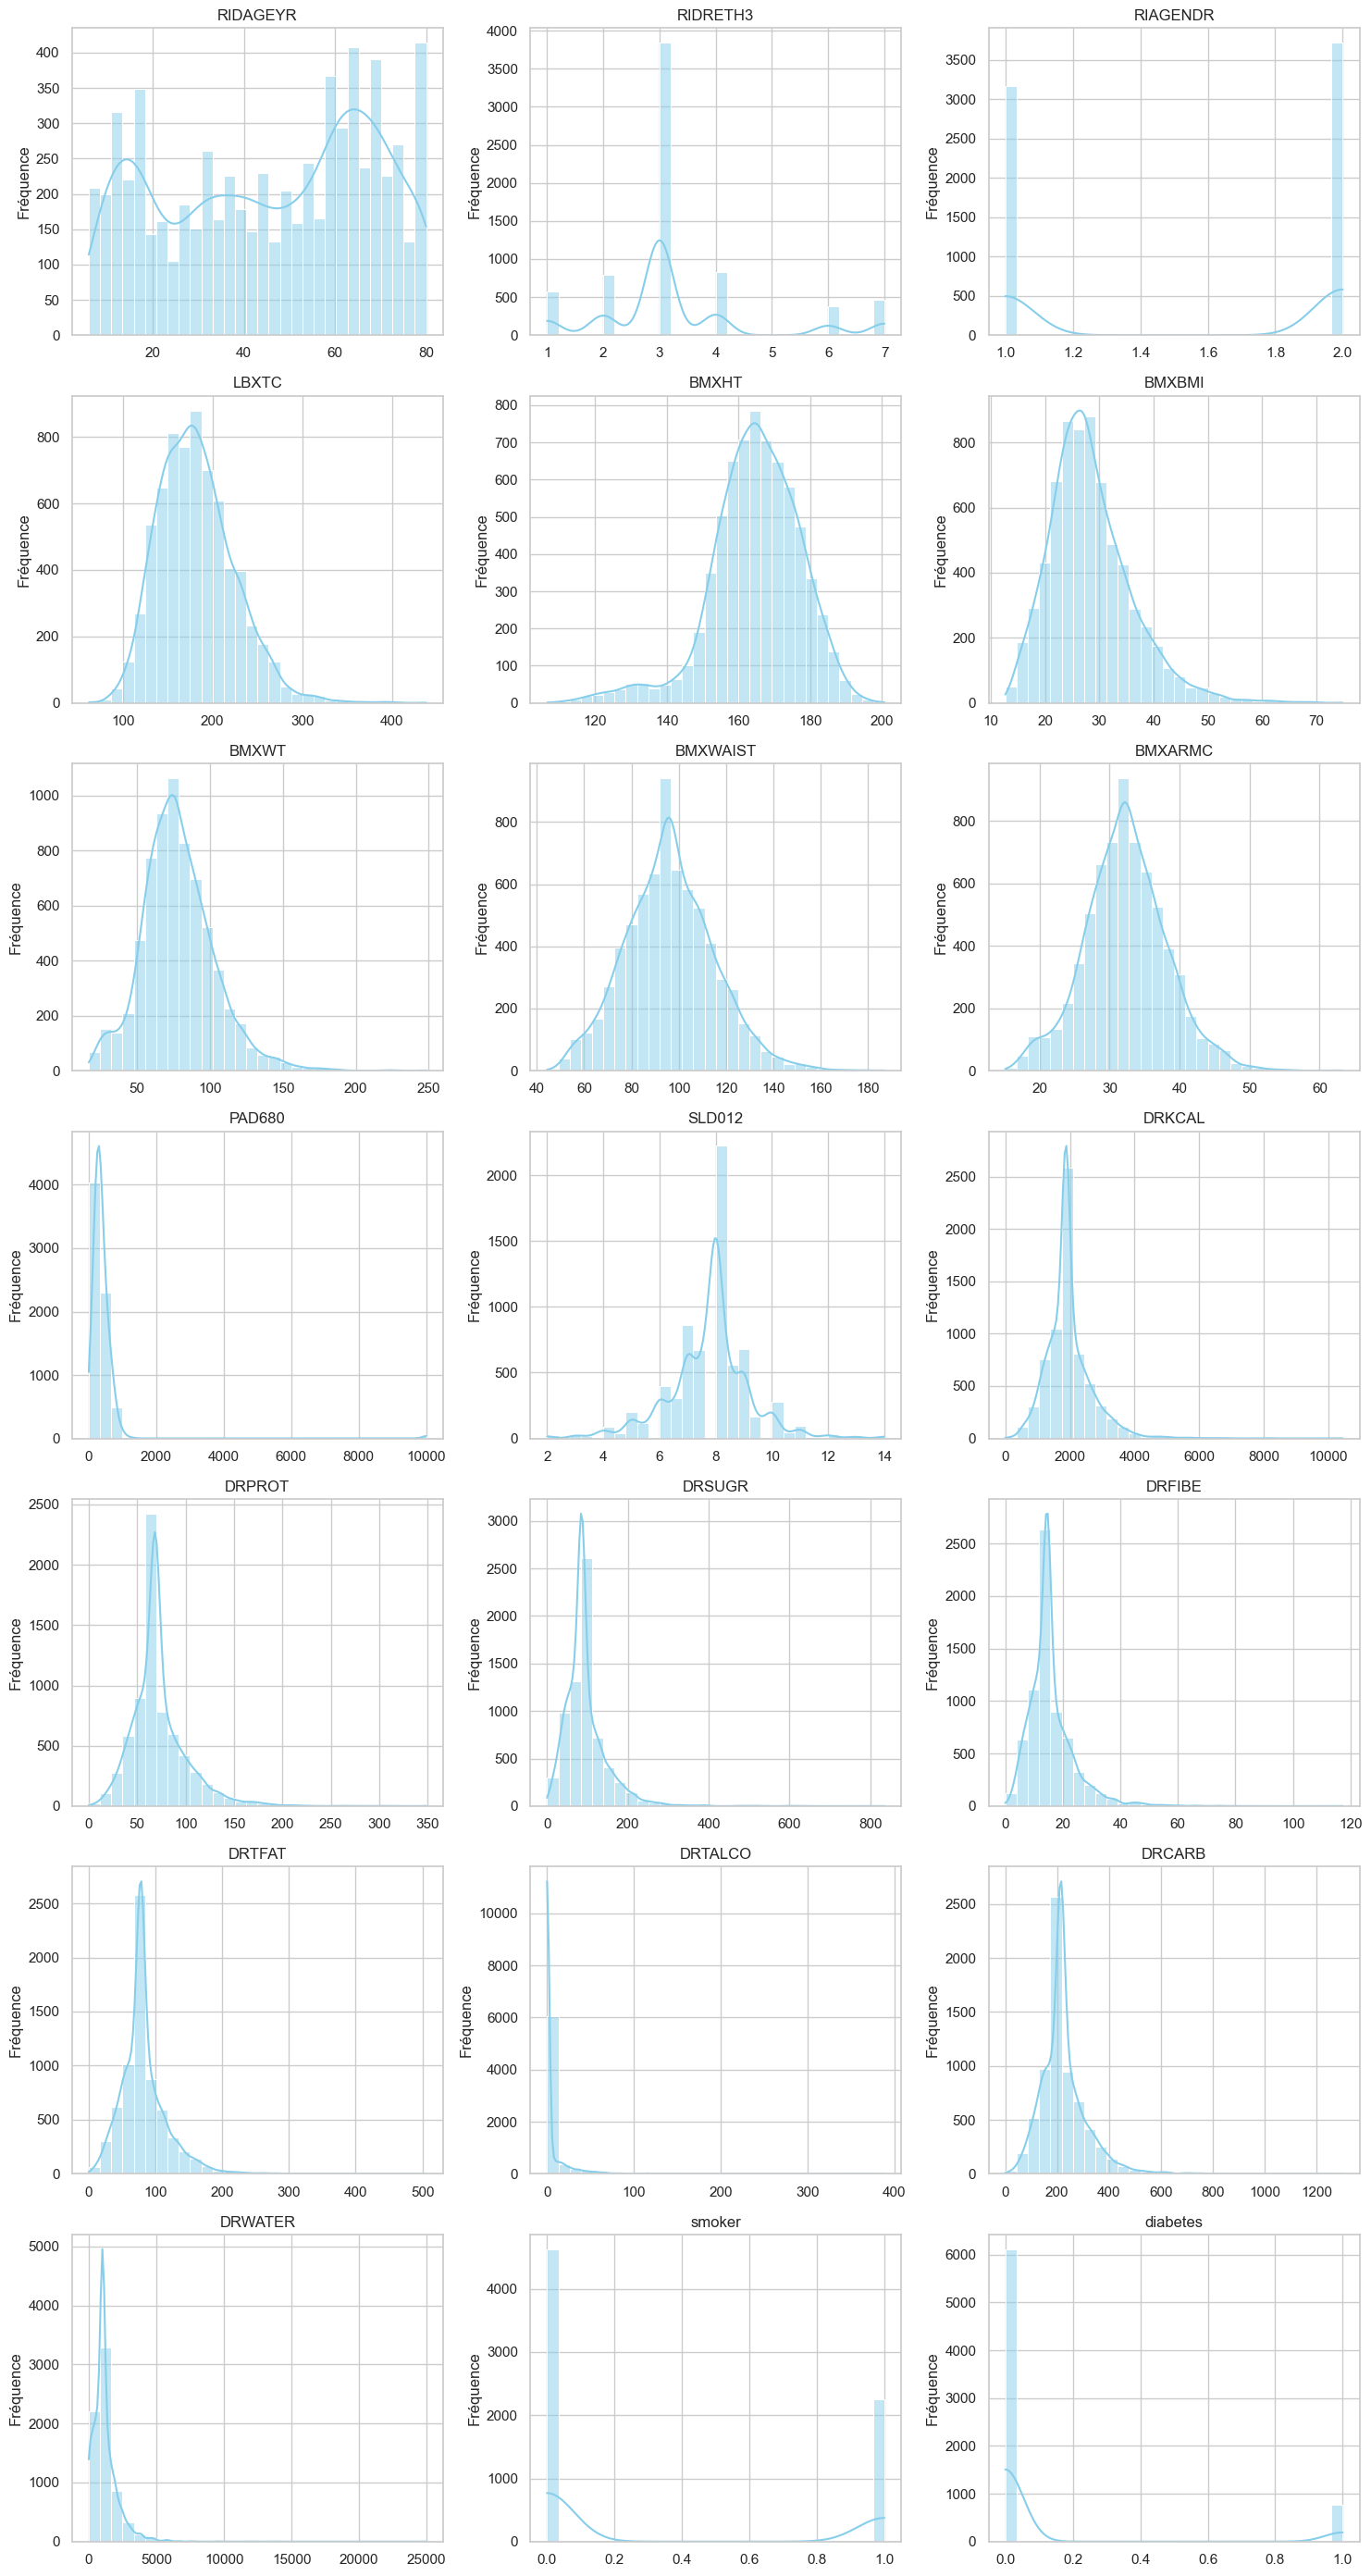

In [20]:
# Cellule 19 — Visualisation des distributions
# === Visualisation automatique de toutes les distributions (sauf SEQN) ===

# Sélection de toutes les colonnes numériques sauf SEQN
vars_to_plot = [col for col in df_model.select_dtypes(include=np.number).columns if col != "SEQN"]

# Création d'une grille de sous-graphiques
n_cols = 3
n_rows = int(np.ceil(len(vars_to_plot) / n_cols))

plt.figure(figsize=(15, 4*n_rows))

for i, var in enumerate(vars_to_plot, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df_model[var], bins=30, kde=True, color="skyblue")
    plt.title(var)
    plt.xlabel("")
    plt.ylabel("Fréquence")

plt.tight_layout()
plt.show()

In [21]:
# Cellule 20 : Analyse des coefficients d'asymétrie (skewness) 

# Sélection uniquement des variables numériques continues
numeric_cols = df_model.select_dtypes(include=[np.number]).columns.tolist()

# Calcul du skewness
skew_values = df_model[numeric_cols].skew().sort_values(ascending=False)

# Affichage clair
print(" Coefficients d'asymétrie (skewness) par variable :")
print(skew_values.round(2))

# Interprétation
high_skew = skew_values[skew_values > 1]
moderate_skew = skew_values[(skew_values > 0.5) & (skew_values <= 1)]

print("\nVariables fortement asymétriques (skewness > 1) :", high_skew.index.tolist())
print("Variables modérément asymétriques (0.5 < skewness ≤ 1) :", moderate_skew.index.tolist())


 Coefficients d'asymétrie (skewness) par variable :
PAD680      12.78
DRTALCO      6.98
DRWATER      4.35
DRSUGR       2.56
diabetes     2.46
DRFIBE       2.17
DRCARB       1.90
DRPROT       1.80
DRTFAT       1.78
DRKCAL       1.71
RIDRETH3     1.15
BMXBMI       1.02
smoker       0.73
LBXTC        0.66
BMXWT        0.62
BMXWAIST     0.27
BMXARMC      0.16
SEQN        -0.01
SLD012      -0.15
RIAGENDR    -0.16
RIDAGEYR    -0.20
BMXHT       -0.79
dtype: float64

Variables fortement asymétriques (skewness > 1) : ['PAD680', 'DRTALCO', 'DRWATER', 'DRSUGR', 'diabetes', 'DRFIBE', 'DRCARB', 'DRPROT', 'DRTFAT', 'DRKCAL', 'RIDRETH3', 'BMXBMI']
Variables modérément asymétriques (0.5 < skewness ≤ 1) : ['smoker', 'LBXTC', 'BMXWT']


In [22]:
# Cellule 21 : création des variables _log

# Liste des variables asymétriques à transformer
log_vars = [
    "PAD680", "DRTALCO", "DRWATER", "DRSUGR", "DRFIBE",
    "DRCARB", "DRPROT", "DRTFAT", "DRKCAL", "BMXBMI"
]

# Copie du DataFrame pour travailler proprement
df_ready = df_model.copy()

# Application du log1p() colonne par colonne
for col in log_vars:
    new_col = f"{col}_log"
    df_ready[new_col] = np.log1p(df_ready[col])

print(f" {len(log_vars)} variables log-transformées créées avec le suffixe '_log'")
print(f"Colonnes créées : {[f'{c}_log' for c in log_vars]}")
print(f"Dimensions du nouveau DataFrame : {df_ready.shape}")

# Aperçu des premières lignes
display(df_ready[[f"{c}_log" for c in log_vars]].head())


 10 variables log-transformées créées avec le suffixe '_log'
Colonnes créées : ['PAD680_log', 'DRTALCO_log', 'DRWATER_log', 'DRSUGR_log', 'DRFIBE_log', 'DRCARB_log', 'DRPROT_log', 'DRTFAT_log', 'DRKCAL_log', 'BMXBMI_log']
Dimensions du nouveau DataFrame : (6889, 32)


,PAD680_log,DRTALCO_log,DRWATER_log,DRSUGR_log,DRFIBE_log,DRCARB_log,DRPROT_log,DRTFAT_log,DRKCAL_log,BMXBMI_log
0,5.888878,3.169686e+00,6.928538,3.138100,1.938742,4.707591,4.494518,3.879913,7.237778,3.332205
1,6.175867,4.115780e+00,4.795791,4.740531,3.224858,5.639919,4.426283,4.306629,7.818229,3.540959
2,5.484797,5.397605e-79,7.466514,4.717784,3.109061,5.506652,4.221197,4.037510,7.459339,3.424263
3,5.198497,2.332144e+00,7.444833,3.913821,2.756840,5.011735,4.587159,4.801559,7.665753,3.440418
4,7.090910,5.397605e-79,5.755267,5.352498,3.152736,5.911582,4.627372,5.221085,8.161518,3.775057


In [23]:
# Cellule 22 : One-Hot Encoding complet de RIDRETH3 ===

# Dictionnaire de correspondance selon le codebook officiel
ethnicity_labels = {
    1: "MexicanAmerican",
    2: "OtherHispanic",
    3: "NonHispanicWhite",
    4: "NonHispanicBlack",
    6: "NonHispanicAsian",
    7: "OtherRace"
}

# Remplacement des codes par les labels explicites
df_ready["RIDRETH3_label"] = df_ready["RIDRETH3"].map(ethnicity_labels)

# Vérification de cohérence
print("Effectifs par catégorie avant encodage :")
print(df_ready["RIDRETH3_label"].value_counts(dropna=False))
print()

# One-hot encoding complet (aucune catégorie supprimée)
ethnicity_dummies = pd.get_dummies(
    df_ready["RIDRETH3_label"],
    prefix="ethnicity",
    drop_first=False  # <== ici on garde toutes les catégories
)

# Fusion dans le DataFrame principal
df_ready = pd.concat(
    [df_ready.drop(columns=["RIDRETH3", "RIDRETH3_label"]), ethnicity_dummies],
    axis=1
)

print(" Encodage one-hot complet effectué sur RIDRETH3")
print("Nouvelles colonnes créées :", list(ethnicity_dummies.columns))
print(f"Dimensions du DataFrame : {df_ready.shape}")


Effectifs par catégorie avant encodage :
RIDRETH3_label
NonHispanicWhite    3843
NonHispanicBlack     829
OtherHispanic        792
MexicanAmerican      578
OtherRace            466
NonHispanicAsian     381
Name: count, dtype: int64

 Encodage one-hot complet effectué sur RIDRETH3
Nouvelles colonnes créées : ['ethnicity_MexicanAmerican', 'ethnicity_NonHispanicAsian', 'ethnicity_NonHispanicBlack', 'ethnicity_NonHispanicWhite', 'ethnicity_OtherHispanic', 'ethnicity_OtherRace']
Dimensions du DataFrame : (6889, 37)


In [24]:
# Cellule 23 : Conversion propre des variables binaires en int
df_ready["RIAGENDR"] = df_ready["RIAGENDR"].astype(int)
df_ready["smoker"] = df_ready["smoker"].astype(int)
df_ready["diabetes"] = df_ready["diabetes"].astype(int)

# Vérification rapide
print(df_ready[["RIAGENDR", "smoker", "diabetes"]].dtypes)


RIAGENDR    int64
smoker      int64
diabetes    int64
dtype: object


In [25]:
# Cellule 24 : distribution de la variable cible 'diabetes' 

# Comptage brut
counts = df_ready["diabetes"].value_counts().sort_index()

# Comptage en pourcentage
percentages = df_ready["diabetes"].value_counts(normalize=True).sort_index() * 100

# Affichage
print("Répartition de la variable cible 'diabetes' :\n")
for label, count, pct in zip(counts.index, counts.values, percentages.values):
    label_str = "Diabétique" if label == 1 else "Non diabétique"
    print(f"{label_str:<15} : {count:>5} individus ({pct:>5.2f}%)")


Répartition de la variable cible 'diabetes' :

Non diabétique  :  6115 individus (88.76%)
Diabétique      :   774 individus (11.24%)


Répartition de la variable binaire 'chol_high' :
chol_high
0    6272
1     617
Name: count, dtype: int64

Pourcentage :
chol_high
0    91.04
1     8.96
Name: proportion, dtype: float64


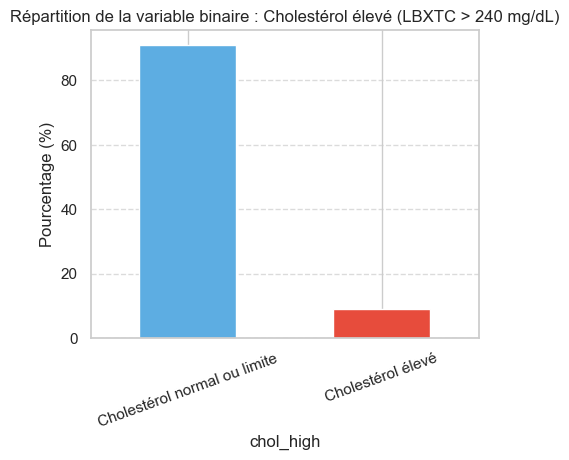

In [26]:
# Cellule 25 : création de la variable binaire "chol_high" ===

# Seuil médicalement reconnu : cholestérol total > 240 mg/dL = trop élevé
df_ready["chol_high"] = (df_ready["LBXTC"] > 240).astype(int)

# Vérification de la répartition
print("Répartition de la variable binaire 'chol_high' :")
print(df_ready["chol_high"].value_counts())
print("\nPourcentage :")
print((df_ready["chol_high"].value_counts(normalize=True) * 100).round(2))

# visualisation

plt.figure(figsize=(5,4))
df_ready["chol_high"].value_counts(normalize=True).sort_index().mul(100).plot(
    kind="bar", color=["#5DADE2", "#E74C3C"]
)
plt.xticks([0,1], ["Cholestérol normal ou limite", "Cholestérol élevé"], rotation=20)
plt.ylabel("Pourcentage (%)")
plt.title("Répartition de la variable binaire : Cholestérol élevé (LBXTC > 240 mg/dL)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [27]:
# Cellule 31 : sauvegarde
df_ready.to_csv("nhanes_ready.csv", index=False)
print(" Fichier final exporté : nhanes_ready.csv")


 Fichier final exporté : nhanes_ready.csv
